In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import time
import requests
from datetime import datetime, timedelta
from shapely.geometry import Point
from busSim import BusSim
from graph import Graph
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

In [2]:
DATA_PATH = "./"
DAY = "monday"
START_TIME = "12:00:00"
ELAPSE_TIME = "00:45:00"
AVG_WALKING_SPEED = 1.4 # 1.4 meters per second
MAX_WALKING_MIN = 45

In [3]:
city = gpd.read_file("./plot/background/madison-shp")
lakes = gpd.read_file("./plot/background/water-shp")
street = gpd.read_file("./plot/background/street-shp")


In [3]:
libdf = pd.read_excel("lib.xlsx")
libdic = {}
for idx,row in libdf.iterrows():
    libdic[row["Library"]] = (row["Latitude"],row["Longitude"])

In [5]:
df_cen = gpd.read_file("zip://plot/background/SCORE.zip")
df_cen.columns

Index(['GEOID10', 'Total Popu', 'Preschool', 'Gradeschoo', 'Teen', 'Senior',
       'White', 'Black or A', 'American I', 'Asian alon', 'Native Haw',
       'Some other', 'Preschoo_1', 'Gradesch_1', 'Teen Perce', 'Old Peop_1',
       'White Perc', 'Black or_1', 'Asian al_1', 'Total Educ', 'Enrolled a',
       'Total Fami', 'under pove', 'Education', 'Poverty Pe', 'SCORE',
       'geometry'],
      dtype='object')

In [4]:
df_coo = gpd.GeoDataFrame(libdf, geometry=gpd.points_from_xy(libdf.Longitude, libdf.Latitude))


In [12]:
ELAPSE_TIME = "00:45:00"
MAX_WALKING_MIN = 45

busSim = BusSim(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN)

dic45mins = {}
for key,value in libdic.items():
    dic45mins[key] = busSim.get_gdf(start_point=value)    
    
final = pd.concat(list(dic45mins.values()), ignore_index=True)
union_45 = gpd.overlay(city, final, how='intersection')
print("45 done")

ELAPSE_TIME = "00:30:00"
MAX_WALKING_MIN = 30

busSim = BusSim(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN)

dic30mins = {}
for key,value in libdic.items():
    dic30mins[key] = busSim.get_gdf(start_point=value)    
    
final = pd.concat(list(dic30mins.values()), ignore_index=True)
union_30 = gpd.overlay(city, final, how='intersection')
print("30 done")

ELAPSE_TIME = "00:15:00"
MAX_WALKING_MIN = 15

busSim = BusSim(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN)

dic15mins = {}
for key,value in libdic.items():
    dic15mins[key] = busSim.get_gdf(start_point=value)    
    
final = pd.concat(list(dic15mins.values()), ignore_index=True)
union_15 = gpd.overlay(city, final, how='intersection')
print("15 done")

45 done
30 done
15 done


In [1]:
from MapGenerator import MapGenerator

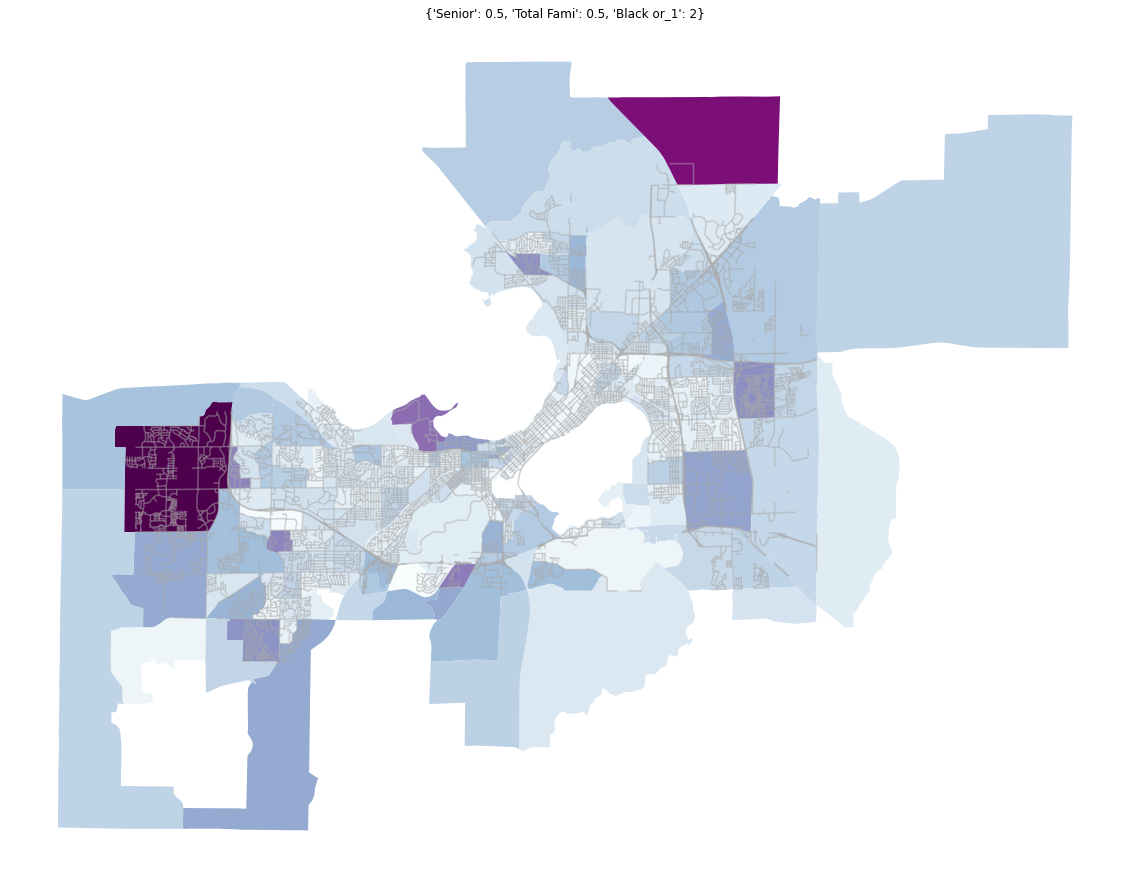

In [5]:
mg = MapGenerator()
ax,df,df_all = mg.combine_map({"Senior":0.5,"Total Fami":0.5,'Black or_1':2},19)

In [18]:
union_45.plot(color="#E84258",ax=ax)
plt.show()

<Figure size 432x288 with 0 Axes>

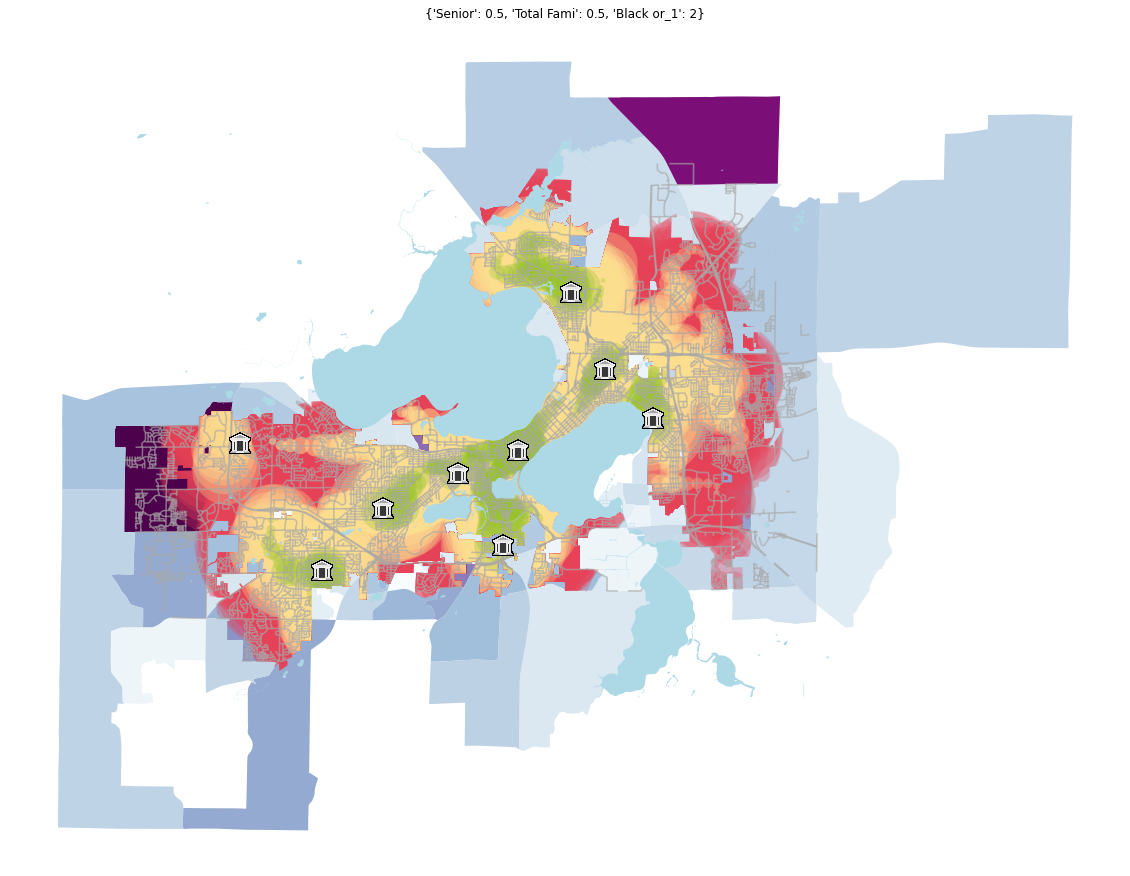

In [20]:
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,AnnotationBbox)

city = gpd.read_file("./plot/background/madison-shp")
lakes = gpd.read_file("./plot/background/water-shp")
street = gpd.read_file("./plot/background/street-shp")
ax,df,df_all = mg.combine_map({"Senior":0.5,"Total Fami":0.5,'Black or_1':2},19)
#ax = city.plot(color="lightgray", alpha=.3, figsize=(12, 12))
union_45.plot(color="#E84258", ax=ax,alpha = .3)
union_30.plot(color="#FEE191", ax=ax,alpha = .3)
union_15.plot(color="#95c22B", ax=ax,alpha = .3)
street.plot(color="darkgray", alpha = .3, ax=ax)
lakes.plot(color="lightblue", ax=ax)

df_coo = gpd.GeoDataFrame(libdf, geometry=gpd.points_from_xy(libdf.Longitude, libdf.Latitude))
lib_png=plt.imread('library.png')    
imagebox_1 = OffsetImage(lib_png, zoom=0.09)
for i in range(len(df_coo)):
    ab_1 = AnnotationBbox(imagebox_1, (df_coo['geometry'].iloc[i].x,df_coo['geometry'].iloc[i].y),frameon=False)
    ax.add_artist(ab_1)


ax.set_axis_off()
#busSim.get_area(gdf) #21786807.680050697



In [7]:
def route_listx(df):
    a=[]
    for i in range(len(df)):
        a.append(df['geometry'].iloc[i].x)
    return a
    
def route_listy(df):
    a=[]
    for i in range(len(df)):
        a.append(df['geometry'].iloc[i].y)
    return a



def plot_line(ax,df,color,zorder=2):
    
    x = route_listx(df)
    y = route_listy(df)

    u = np.array([x[i+1]-x[i] for i in range(len(x)-1)])
    v = np.array([y[i+1]-y[i] for i in range(len(x)-1)])

    x = x[:len(u)] 
    y = y[:len(v)]

    ax.quiver(x,y,u,v,angles='xy', scale_units='xy', scale=1,
          headaxislength=5.5,headlength=10,headwidth=7,width=0.002,color=color)
    
def plot_line_1(ax,df,color,zorder=2):
    
    x = route_listx(df)
    y = route_listy(df)

    u = np.array([x[i+1]-x[i] for i in range(len(x)-1)])
    v = np.array([y[i+1]-y[i] for i in range(len(x)-1)])

    x = x[:len(u)] 
    y = y[:len(v)]

    ax.quiver(x,y,u,v,angles='xy', scale_units='xy', 
              scale=1,headaxislength=0,headlength=0,headwidth=0,width=0.002,color=color)

In [8]:
gdf.set_crs("EPSG:4326")

NameError: name 'gdf' is not defined

In [19]:
gdf.crs

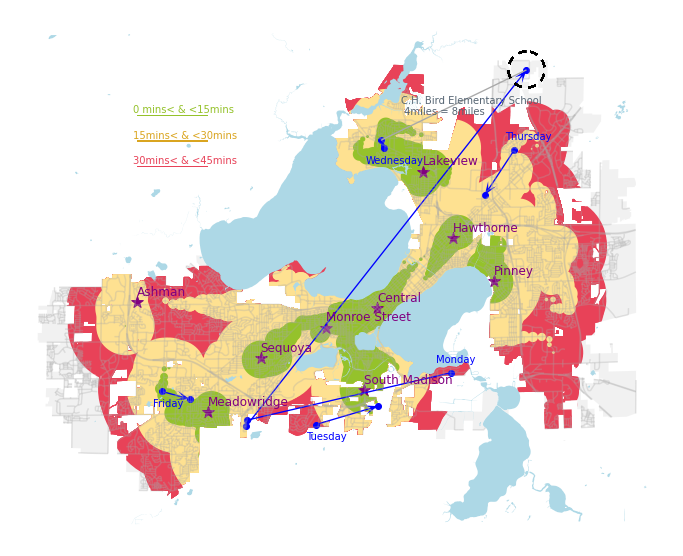

In [72]:
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,AnnotationBbox)

city = gpd.read_file("./plot/background/madison-shp")
lakes = gpd.read_file("./plot/background/water-shp")
street = gpd.read_file("./plot/background/street-shp")

ax = city.plot(color="lightgray", alpha=.3, figsize=(12, 12))
union_45.plot(color="#E84258", ax=ax)
union_30.plot(color="#FEE191", ax=ax)
union_15.plot(color="#95c22B", ax=ax)
street.plot(color="darkgray", alpha = .3, ax=ax)
lakes.plot(color="lightblue", ax=ax)
libdf = pd.read_excel("lib.xlsx")

df_coo = gpd.GeoDataFrame(libdf, geometry=gpd.points_from_xy(libdf.Longitude, libdf.Latitude))
lib_png=plt.imread('library.png')    
imagebox_1 = OffsetImage(lib_png, zoom=0.09)
# for i in range(len(df_coo)):
#     ab_1 = AnnotationBbox(imagebox_1, (df_coo['geometry'].iloc[i].x,df_coo['geometry'].iloc[i].y),frameon=False)
#     ax.add_artist(ab_1)

df_dreambus=pd.read_excel('Dream bus.xlsx')
df_coo=pd.read_excel('lib coor.xlsx')

#water.plot(ax=ax,color='lightblue')
gdf_dreambus = gpd.GeoDataFrame(
    df_dreambus, geometry=gpd.points_from_xy(df_dreambus.Longitude, df_dreambus.Latitude))
gdf_dreambus = gdf_dreambus.set_crs("EPSG:4326")
gdf_dreambus.plot(ax=ax,marker='o', color='b')   

gdf = gpd.GeoDataFrame(
     df_coo, geometry=gpd.points_from_xy(df_coo.Longitude, df_coo.Latitude))
gdf = gdf.set_crs("EPSG:4326")
gdf.plot(ax=ax,marker='*', color='Purple',markersize=150)

for i in range(len(df_coo)):
      plt.text(df_coo.Longitude[i],df_coo.Latitude[i]*1.00006,str(df_coo.Library[i]),color='Purple',size=12)

Monday=gdf_dreambus[0:4]
Tuesday=gdf_dreambus[4:6]
Wednesday=gdf_dreambus[6:8]
Thursday=gdf_dreambus[8:10]
Friday=gdf_dreambus[10:]

plot_line(ax, Monday[-2:],'b')
plot_line(ax, Tuesday,'b')
plot_line(ax, Wednesday,'b')
plot_line(ax, Thursday,'b')
plot_line(ax, Friday,'b')



plot_line_1(ax, Monday[0:3],'b')

dashcircle=plt.imread('dashed-circle.png')    
imagebox_circle = OffsetImage(dashcircle, zoom=0.075)
ab_circle = AnnotationBbox(imagebox_circle, (Monday[-1:].Longitude,Monday[-1:].Latitude),frameon=False)
ax.add_artist(ab_circle)

plot_line_1(ax,Monday[-1:].append(Wednesday[-1:]),color='darkgrey')
plt.text(-89.3063-0.068, 43.16819-0.018,'C.H. Bird Elementary School \n 4miles = 8miles',size=10,color='#566573')

# manually plot legend
df_lgd = pd.DataFrame([[43.15,-89.517674],
                       [43.15,-89.479143],
                      [43.14,-89.517674],
                      [43.14,-89.479143],
                       [43.13,-89.517674],
                      [43.13,-89.479143]],columns=["Latitude","Longitude"])
gdf_lgd = gpd.GeoDataFrame(
     df_lgd, geometry=gpd.points_from_xy(df_lgd.Longitude, df_lgd.Latitude))
gdf_lgd = gdf_lgd.set_crs("EPSG:4326")

plot_line_1(ax, gdf_lgd[:2],'#95c22B')
plt.text(-89.5-0.02, 43.15+0.001,'0 mins< & <15mins',size=10,color='#95c22B')
plot_line_1(ax, gdf_lgd[2:4],'#DAA520')
plt.text(-89.5-0.02, 43.14+0.001,'15mins< & <30mins',size=10,color='#DAA520')
plot_line_1(ax, gdf_lgd[4:],'#E84258')
plt.text(-89.5-0.02, 43.13+0.001,'30mins< & <45mins',size=10,color='#E84258')

# weekday label
plt.text(Monday.Longitude.head(1)-0.008,Monday.Latitude.head(1)+0.004,'Monday',color='b')
plt.text(Tuesday.Longitude.head(1)-0.005,Tuesday.Latitude.head(1)-0.006,'Tuesday',color='b')
plt.text(Wednesday.Longitude.head(1)-0.01,Wednesday.Latitude.head(1)-0.006,'Wednesday',color='b')
plt.text(Thursday.Longitude.head(1)-0.005,Thursday.Latitude.head(1)+0.004,'Thursday',color='b')
plt.text(Friday.Longitude.head(1)-0.005,Friday.Latitude.head(1)-0.006,'Friday',color='b')


ax.set_axis_off()
#busSim.get_area(gdf) #21786807.680050697
plt.draw()
plt.savefig("fig.png")

In [64]:
type(Tuesday.Longitude[0])

KeyError: 0

In [68]:
Tuesday.Longitude.head(1)

4   -89.42079
Name: Longitude, dtype: float64

In [8]:
#ax,fig = plt
TotCir = pd.read_csv("TotalCir.csv",index_col=0)


In [10]:
TotCir = TotCir.T[['Mondays','Tuesdays','Wednesdays','Thursdays','Fridays']].T
TotCir.sum()

Total Circulation    2389461.0
dtype: float64

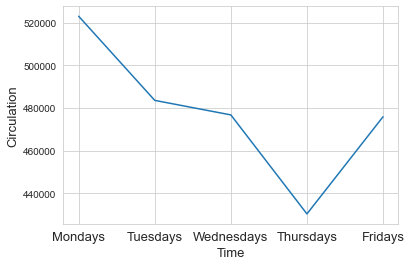

In [13]:
import seaborn as sns
sns.set_style("whitegrid")
#TotCir.plot()

plt.plot(TotCir.index,TotCir["Total Circulation"])
plt.xlabel('Time',size=13)
plt.ylabel('Circulation',size=13)
plt.xticks(fontsize=13)
plt.savefig("cir.png",dpi=300)

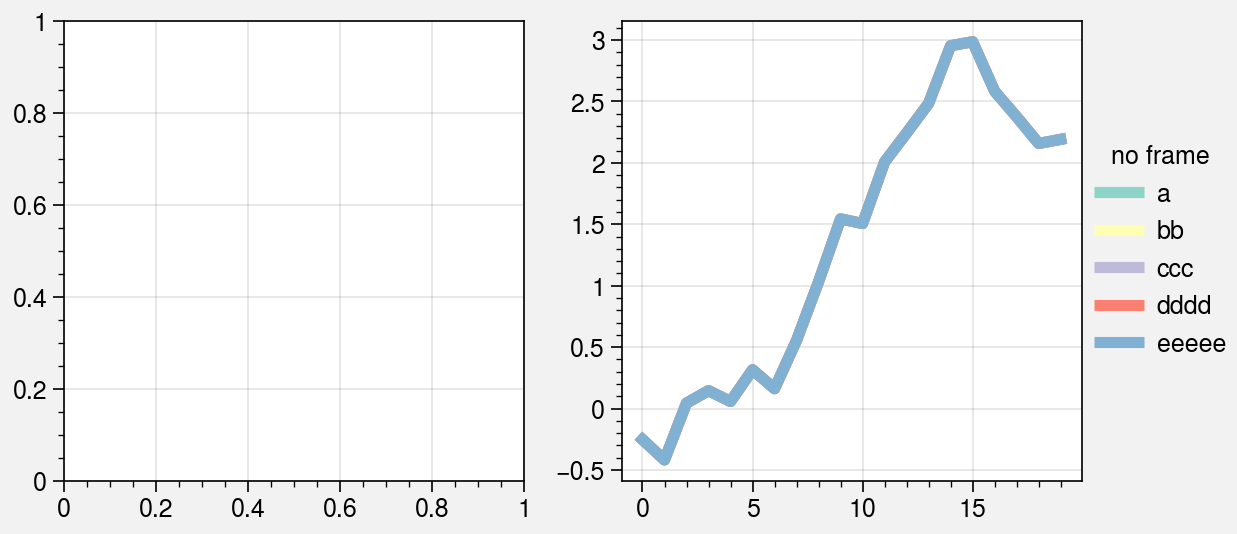

In [51]:
import proplot as plot
import numpy as np
plot.rc.cycle = '538'
labels = ['a', 'bb', 'ccc', 'dddd', 'eeeee']
fig, axs = plot.subplots(ncols=2, span=False, share=1, axwidth=2.3)
hs1, hs2 = [], []

# On-the-fly legends
#state = np.random.RandomState(51423)
for i, label in enumerate(labels):
     #data = (state.rand(20) - 0.45).cumsum(axis=0)
#     h1 = axs[0].plot(
#         data, lw=4, label=label, legend='ul',
#         legend_kw={'order': 'F', 'title': 'column major'}
#     )
#     hs1.extend(h1)
    h2 = axs[1].plot(
        data, lw=4, label=label, legend='r', cycle='Set3',
        legend_kw={'ncols': 1, 'frame': False, 'title': 'no frame'}
    )
    hs2.extend(h2)

# Outer legends
# ax = axs[0]
# ax.legend(
#     hs1, loc='b', ncols=3, title='row major', order='C',
#     facecolor='gray2'
# )
ax = axs[1]
# ax.legend(hs2, loc='b', ncols=3, center=True, title='centered rows')
# axs.format(xlabel='xlabel', ylabel='ylabel', suptitle='Legend formatting demo')

In [46]:
data

array([-0.25265843, -0.41854107,  0.04417145,  0.14541004,  0.05731432,
        0.31582735,  0.16111508,  0.55511634,  1.03247025,  1.54407482,
        1.50611545,  2.00731665,  2.24331791,  2.48435207,  2.95421738,
        2.98643968,  2.58371147,  2.37507448,  2.15823726,  2.19151305])

In [146]:
ELAPSE_TIME = "00:15:00"
MAX_WALKING_MIN = 15
busSim = BusSim(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN)
gdf = busSim.get_gdf(start_point=(43.076071,-89.517674))
gdf

stop_id  stop_lon   stop_lat  radius  \
0     6551   -89.524  43.066666    29.4   

                                            geometry  \
0  POLYGON ((-89.52364 43.06668, -89.52364 43.066...   

            geometry_centriod  
0  POINT (-89.52400 43.06667)

In [123]:
joins = gdf.append(gdf1).append(gdf2).append(gdf3).append(gdf4).append(gdf5).append(gdf6).append(gdf7).append(gdf8)
joins

stop_id   stop_lon   stop_lat  radius  \
0       6551 -89.524000  43.066666  3809.4   
1       6279 -89.524622  43.069647  3750.6   
2       6365 -89.525082  43.072171  3696.0   
3       6605 -89.526418  43.073835  3656.8   
4       6527 -89.525013  43.075627  3592.4   
..       ...        ...        ...     ...   
695     9770 -89.299049  43.108743    19.6   
696     7987 -89.291307  43.062466    11.2   
697     9587 -89.313995  43.123735     9.8   
698     2597 -89.463235  43.049921     5.6   
699     6326 -89.482754  43.087560     4.2   

                                              geometry  \
0    POLYGON ((-89.47728 43.06881, -89.47722 43.065...   
1    POLYGON ((-89.47863 43.07176, -89.47857 43.068...   
2    POLYGON ((-89.47975 43.07426, -89.47969 43.070...   
3    POLYGON ((-89.48157 43.07590, -89.48151 43.072...   
4    POLYGON ((-89.48095 43.07765, -89.48089 43.074...   
..                                                 ...   
695  POLYGON ((-89.29881 43.10875, -89.29881 43.108...   
696  POLYGON ((-89.29117 43.06247, -89.29117 43.062...   
697  POLYGON ((-89.31387 43.12374, -89.31387 43.123...   
698  POLYGON ((-89.46317 43.04992, -89.46317 43.049...   
699  POLYGON ((-89.48270 43.08756, -89.48270 43.087...   

              geometry_centriod  
0    POINT (-89.52400 43.06667)  
1    POINT (-89.52462 43.06965)  
2    POINT (-89.52508 43.07217)  
3    POINT (-89.52642 43.07383)  
4    POINT (-89.52501 43.07563)  
..                          ...  
695  POINT (-89.29905 43.10874)  
696  POINT (-89.29131 43.06247)  
697  POINT (-89.31399 43.12373)  
698  POINT (-89.46323 43.04992)  
699  POINT (-89.48275 43.08756)  

[5494 rows x 6 columns]

In [127]:
joins = joins.sort_values("radius",ascending=False).drop_duplicates(subset=['stop_id'], keep='first')
joins

stop_id   stop_lon   stop_lat  radius  \
0         475 -89.393786  43.041625  4914.0   
1         709 -89.393810  43.044427  4851.0   
2        1310 -89.386180  43.074954  4795.0   
3         883 -89.388217  43.074641  4795.0   
4         195 -89.393808  43.047050  4790.8   
...       ...        ...        ...     ...   
1241     7955 -89.323880  43.079675    50.4   
1242     9834 -89.306588  43.142702    43.4   
1243     7987 -89.291307  43.062466    11.2   
1244     6326 -89.482754  43.087560     4.2   
1245     9132 -89.309309  43.140743     1.4   

                                               geometry  \
0     POLYGON ((-89.33354 43.04432, -89.33348 43.039...   
1     POLYGON ((-89.33434 43.04709, -89.33427 43.042...   
2     POLYGON ((-89.32736 43.07758, -89.32730 43.073...   
3     POLYGON ((-89.32940 43.07727, -89.32933 43.073...   
4     POLYGON ((-89.33507 43.04968, -89.33500 43.045...   
...                                                 ...   
1241  POLYGON ((-89.32326 43.07970, -89.32326 43.079...   
1242  POLYGON ((-89.30606 43.14273, -89.30605 43.142...   
1243  POLYGON ((-89.29117 43.06247, -89.29117 43.062...   
1244  POLYGON ((-89.48270 43.08756, -89.48270 43.087...   
1245  POLYGON ((-89.30929 43.14074, -89.30929 43.140...   

               geometry_centriod  
0     POINT (-89.39379 43.04163)  
1     POINT (-89.39381 43.04443)  
2     POINT (-89.38618 43.07495)  
3     POINT (-89.38822 43.07464)  
4     POINT (-89.39381 43.04705)  
...                          ...  
1241  POINT (-89.32388 43.07968)  
1242  POINT (-89.30659 43.14270)  
1243  POINT (-89.29131 43.06247)  
1244  POINT (-89.48275 43.08756)  
1245  POINT (-89.30931 43.14074)  

[1246 rows x 6 columns]

In [125]:
joins = joins.reset_index(drop=True)
joins[joins["radius"]<840][joins["radius"]>420]

c:\pathon\lib\site-packages\geopandas\geodataframe.py:828: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


stop_id   stop_lon   stop_lat  radius  \
1153     6327 -89.507359  43.075442   827.4   
1154     2320 -89.465303  43.061022   824.6   
1155     2165 -89.478145  43.083963   823.2   
1156     7569 -89.293666  43.061654   821.8   
1157     7658 -89.318054  43.078462   817.6   
1158     9783 -89.307009  43.127445   817.6   
1159     6265 -89.481044  43.051651   813.4   
1160     8685 -89.477416  43.036595   809.2   
1161     9171 -89.330422  43.117301   802.2   
1162     6423 -89.480749  43.053048   785.4   
1163     6901 -89.474572  43.110287   778.4   
1164     9391 -89.304300  43.129090   770.0   
1165     7302 -89.297454  43.062526   768.6   
1166     2892 -89.475316  43.082200   756.0   
1167      969 -89.395723  43.072279   750.4   
1168     2982 -89.469116  43.059445   742.0   
1169     9351 -89.301814  43.130690   725.2   
1170     2793 -89.477991  43.060677   721.0   
1171     6309 -89.509278  43.079882   712.6   
1172     2790 -89.467794  43.076572   705.6   
1173     2488 -89.468164  43.056795   690.2   
1174     7996 -89.303551  43.062496   690.2   
1175     7247 -89.313778  43.073660   672.0   
1176     9101 -89.330256  43.121026   672.0   
1177     6878 -89.471980  43.113117   672.0   
1178     2867 -89.470276  43.078245   666.4   
1179     9701 -89.297648  43.131985   658.0   
1180     6817 -89.506181  43.081191   653.8   
1181     2344 -89.469594  43.055040   642.6   
1182     7689 -89.311433  43.073425   641.2   
1183     7668 -89.307464  43.062446   639.8   
1184     2193 -89.472636  43.080312   624.4   
1185     6110 -89.475179  43.112731   624.4   
1186     9163 -89.307786  43.128037   613.2   
1187     6615 -89.502477  43.081050   592.2   
1188     7235 -89.307965  43.073082   588.0   
1189     6560 -89.474893  43.110546   583.8   
1190     2197 -89.475082  43.082424   581.0   
1191     7520 -89.312068  43.062351   581.0   
1192     9725 -89.329781  43.125574   564.2   
1193     6243 -89.477677  43.084644   534.8   
1194     9118 -89.290660  43.135900   530.6   
1195     7168 -89.308510  43.071507   526.4   
1196     9787 -89.327260  43.125518   525.0   
1197     9412 -89.290478  43.134350   491.4   
1198     6582 -89.480227  43.107930   491.4   
1199     6921 -89.501941  43.076493   478.8   
1200     9161 -89.304049  43.131257   477.4   
1201     9797 -89.323307  43.125507   462.0   
1202     9720 -89.290654  43.132470   457.8   
1203     7277 -89.308543  43.066753   453.6   
1204     6569 -89.483162  43.088160   450.8   
1205     6120 -89.484215  43.105985   425.6   

                                               geometry  \
1153  POLYGON ((-89.49721 43.07591, -89.49720 43.075...   
1154  POLYGON ((-89.45519 43.06148, -89.45518 43.060...   
1155  POLYGON ((-89.46805 43.08442, -89.46803 43.083...   
1156  POLYGON ((-89.28359 43.06210, -89.28358 43.061...   
1157  POLYGON ((-89.30802 43.07891, -89.30801 43.078...   
1158  POLYGON ((-89.29697 43.12789, -89.29696 43.127...   
1159  POLYGON ((-89.47107 43.05211, -89.47106 43.051...   
1160  POLYGON ((-89.46750 43.03705, -89.46748 43.036...   
1161  POLYGON ((-89.32057 43.11774, -89.32056 43.117...   
1162  POLYGON ((-89.47112 43.05349, -89.47111 43.052...   
1163  POLYGON ((-89.46502 43.11072, -89.46501 43.110...   
1164  POLYGON ((-89.29485 43.12951, -89.29484 43.128...   
1165  POLYGON ((-89.28803 43.06294, -89.28802 43.062...   
1166  POLYGON ((-89.46604 43.08262, -89.46603 43.081...   
1167  POLYGON ((-89.38652 43.07269, -89.38651 43.072...   
1168  POLYGON ((-89.46002 43.05986, -89.46001 43.059...   
1169  POLYGON ((-89.29291 43.13108, -89.29290 43.130...   
1170  POLYGON ((-89.46915 43.06108, -89.46914 43.060...   
1171  POLYGON ((-89.50054 43.08028, -89.50053 43.079...   
1172  POLYGON ((-89.45914 43.07697, -89.45913 43.076...   
1173  POLYGON ((-89.45970 43.05718, -89.45969 43.056...   
1174  POLYGON ((-89.29509 43.06287, -89.29508 43.062...   
1175  POLYGON ((-89.30554 43.07402, -89.30553 43.073...   
1176  POLYGON ((-89.32201 43.12139, -89.32200 43.12

c:\pathon\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if sys.path[0] == '':
c:\pathon\lib\site-packages\geopandas\geodataframe.py:828: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)
c:\pathon\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]
c:\pathon\lib\site-packages\geopandas\geodataframe.py:828: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)
c:\pathon\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Geometry is in a geographic CRS. Re

<AxesSubplot:>

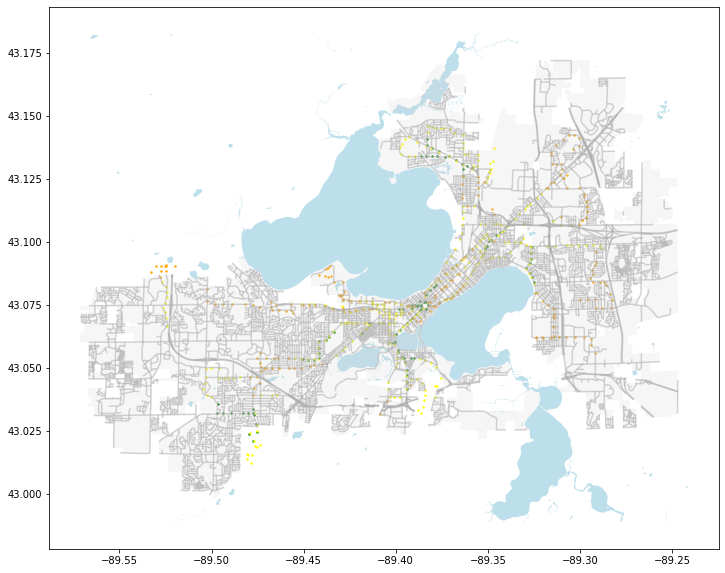

In [141]:
ax = city.plot(color="lightgray", alpha=.2, figsize=(12, 12), zorder=2)
lakes.plot(color="lightblue", ax=ax, zorder=1, alpha=0.8)
street.plot(color="darkgray", alpha = .5, ax=ax, zorder=3)

#joins[joins["radius"]<840].difference(lakes.unary_union).plot(color="red", ax=ax,alpha = 0.3)

#joins[joins["radius"]>840][joins["radius"]<1680].difference(lakes.unary_union).plot(color="yellow", ax=ax,alpha = 0.3)
#joins[joins["radius"]>1680][joins["radius"]<2520].difference(lakes.unary_union).plot(color="green", ax=ax,alpha = 0.3)
#joins[joins["radius"]>2520][joins["radius"]<3360].difference(lakes.unary_union).plot(color="blue", ax=ax,alpha = 0.3)
#joins[joins["radius"]>3360][joins["radius"]<4200].difference(lakes.unary_union).plot(color="orange", ax=ax,alpha = 0.3)
#joins[joins["radius"]>4200].difference(lakes.unary_union).plot(color="black", ax=ax,alpha = 0.3)
#joins[joins["radius"]>4200]["geometry"].centroid.plot(color="green", ax=ax, markersize=2)
#joins[joins["radius"]>3360][joins["radius"]<4200].centroid.plot(color="yellow", ax=ax, markersize=2)
#joins[joins["radius"]>2520][joins["radius"]<3360].centroid.plot(color="orange", ax=ax, markersize=2)
#joins[joins["radius"]>1680][joins["radius"]<2520].centroid.plot(color="blue", ax=ax, markersize=2)
#joins[joins["radius"]>840][joins["radius"]<1680].centroid.plot(color="red", ax=ax, markersize=2)
#joins[joins["radius"]<840].centroid.plot(color="black", ax=ax, markersize=2)
#joins[joins["radius"]>1260][joins["radius"]<1680].difference(lakes.unary_union).plot(color="yellow", ax=ax,alpha = 0.3)

In [22]:
df = busSim.stopTimes_final_df
df[df["stop_id"] == 967]

service_id  route_short_name  trip_id  stop_id  stop_sequence  \
32581     94_WKD                10  1027430      520             29   
32582     94_WKD                10  1027432      520             29   

         arrival_time  shape_dist_traveled   stop_lat   stop_lon  \
32581 0 days 12:28:21               5.2371  43.068634 -89.388936   
32582 0 days 12:58:21               5.2371  43.068634 -89.388936   

       cardinal_direction  
32581               180.0  
32582               180.0

21550622.595168628

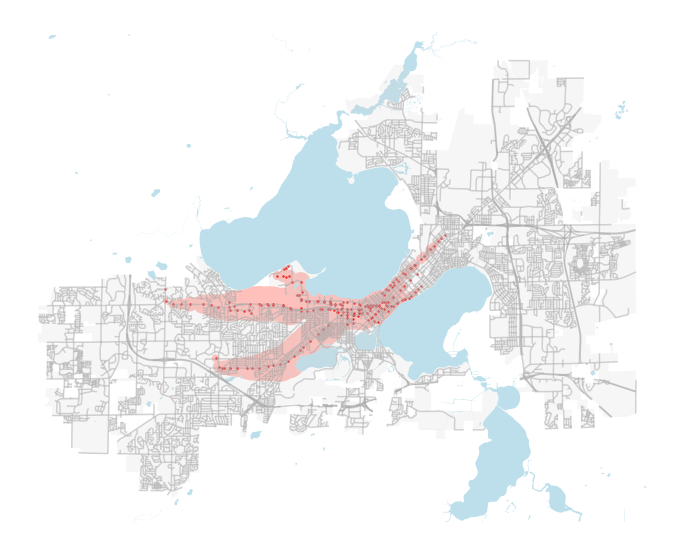

In [5]:
busSim = BusSim(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN, trip_delays=[(1024695, "00:04:00")])
gdf = busSim.get_gdf(765)
city = gpd.read_file("../data/plot/background/madison-shp")
lakes = gpd.read_file("../data/plot/background/water-shp")
street = gpd.read_file("../data/plot/background/street-shp")

ax = city.plot(color="lightgray", alpha=.2, figsize=(12, 12), zorder=2)
lakes.plot(color="lightblue", ax=ax, zorder=1, alpha=0.8)
street.plot(color="darkgray", alpha = .5, ax=ax, zorder=3)
gdf.difference(lakes.unary_union).plot(color="#ffbfba", ax=ax)
gdf["geometry"].centroid.plot(color="red", ax=ax, markersize=2)

ax.set_axis_off()
busSim.get_area(gdf) #20682522.238682237

In [27]:
def fmin(minutes):
    return f"{minutes // 60}:{minutes % 60}:00"

perf = pd.DataFrame()

for t in [10, 20, 30, 40, 50, 60]:
    print(t)
    t0 = time.time()
    busSim = BusSim(DATA_PATH, DAY, START_TIME, fmin(t), AVG_WALKING_SPEED, MAX_WALKING_MIN)
    t1 = time.time()
    gdf = busSim.get_gdf(765)
    t2 = time.time()
    perf.loc[t, "graph-gen"] = t1 - t0
    perf.loc[t, "gen-dataframe"] = t2 - t1

perf

10
20
30
40
50
60


graph-gen  gen-dataframe
10   1.490974       0.436377
20   1.839939       0.471731
30   2.561392       0.488621
40   3.578030       0.581640
50   4.746873       0.643338
60   6.109272       0.678432

In [28]:
def fmin(minutes):
    return f"{minutes // 60}:{minutes % 60}:00"

perf = pd.DataFrame()

for t in [10, 20, 30, 40, 50, 60:
    print(t)
    t0 = time.time()
    busSim = BusSim(DATA_PATH, DAY, START_TIME, fmin(t), AVG_WALKING_SPEED, MAX_WALKING_MIN)
    t1 = time.time()
    gdf = busSim.get_gdf(start_point=(43.072076, -89.398291))
    t2 = time.time()
    perf.loc[t, "graph-gen"] = t1 - t0
    perf.loc[t, "gen-dataframe"] = t2 - t1

perf

10
20
30
40
50
60
70
80
90


graph-gen  gen-dataframe
10   1.564986       0.441076
20   1.821449       0.454345
30   2.485040       0.514306
40   3.429946       0.580983
50   4.576142       0.649454
60   5.923128       0.815186
70   7.881356       0.790881
80   9.760332       0.847786
90  11.980241       0.901834

In [10]:
pd.read_csv("df_cen.csv")

Unnamed: 0  geo_key           name bndry_chg  acres  hu_10  pc_own_10  \
0            0       52  Spring Harbor        No  496.8   1326       69.9   
1            1       21        Gompers        No  454.4   1449       90.1   
2            2       27       Sycamore        No  803.4   2213       44.2   
3            3        3    Tenney Park        No  355.1   2930       26.7   
4            4        7   Emerson-Eken        No  761.8   2567       52.4   
..         ...      ...            ...       ...    ...    ...        ...   
58          58       22        Mendota        No  628.0    363       80.3   
59          59       41      Near West        No  303.6   6652        2.0   
60          60       64      Greentree        No  976.7   3130       44.5   
61          61       67    Arbor-McKee        No  483.5   1554       35.9   
62          62       70         Badger        No  752.8   1418       58.5   

    tot_pop_10  pc_un5_10  pc_un18_10  ...  cc_enrlmt  medhhinc  fam_pov  \
0         2531        6.2        17.3  ...        152     75485       15   
1         3386        6.4        21.2  ...        104     71031       49   
2         5082        8.5        24.6  ...        171     63969      106   
3         5258        3.5        10.4  ...        223     56252       28   
4         4804        6.7        15.5  ...        119     54357       54   
..         ...        ...         ...  ...        ...       ...      ...   
58        1341        5.9        14.8  ...        103     N/A""    N/A""   
59       16318        0.3         0.5  ...         96     25868      129   
60        6652        7.0        24.3  ...        495     57159      329   
61        3202        7.8        22.2  ...        165     N/A""    N/A""   
62        3296        8.9        26.9  ...         25     N/A""    N/A""   

    pc_unem  gds_svcs  pc_trst  trst_trps  pc_ownvh  avg_stcnd  \
0       6.5         G     66.2       1274      92.1        4.6   
1       2.5      None     87.9        504      94.8        6.6   
2         2     P,B,G     64.2        468      89.9        7.3   
3       2.5       B,G     93.2       2720      88.5        6.7   
4       5.2     P,B,G     98.9       4255        89        6.6   
..      ...       ...      ...        ...       ...        ...   
58    N/A""      None     47.5        258     N/A""        6.7   
59      4.3     P,B,G     99.0       6815        55        6.7   
60      3.2     P,B,G     83.9       1182      93.5        6.2   
61    N/A""     P,B,G     96.5        863     N/A""        6.1   
62    N/A""       P,B     63.7        357     N/A""        5.9   

                                             geometry  
0   MULTIPOLYGON (((-89.29973780907351 43.17195237...  
1   POLYGON ((-89.37873948355066 43.07854366838184...  
2   MULTIPOLYGON (((-89.36973008960287 43.09369433...  
3   POLYGON ((-89.34975682637659 43.08852306194874...  
4   MULTIPOLYGON (((-89.33224763409879 43.09356928...  
..                                                ...  
58  MULTIPOLYGON (((-89.56652719942062 43.07470931...  
59  POLYGON ((-89.53696902904703 43.07479940495973...  
60  POLYGON ((-89.53271640094009 43.04590555237517...  
61  POLYGON ((-89.53271640094009 43.04590555237517...  
62  POLYGON ((-89.53351038270671 43.01600293635192...  

[63 rows x 56 columns]